In [1]:
import cython
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pymc3 as pm
import pandas as pd

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [9]:
K = 4
n = 10000
mu_0 = [-5, 1, 7, 14]
sigma_0 = [1.5, 0.5, 2.5, 3]

pi = [0.20, 0.25, 0.20, 0.35]

In [10]:
x = []
cluster = []

for _ in range(n):
    x_cluster = np.random.choice([0, 1, 2, 3], size=[1,], p=pi)[0]
    x.append(np.random.normal(loc=mu_0[x_cluster], scale=sigma_0[x_cluster], size=[1,]).tolist()[0])
    cluster.append(x_cluster)
    
x = np.array(x)

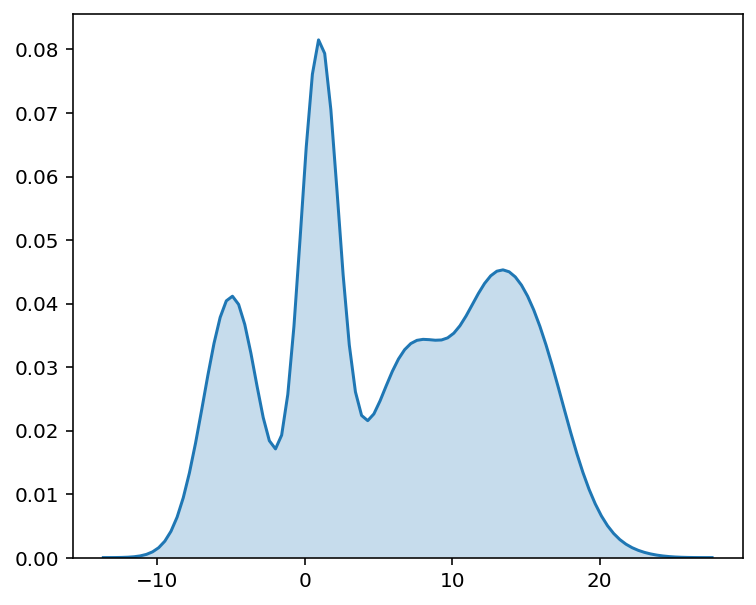

In [11]:
fig = plt.figure(figsize=(6, 5))
sns.kdeplot(x, shade=True)

### Can have all components together

In [12]:
with pm.Model() as model:
    p = pm.Dirichlet("p", a=np.tile(1, K))
    
    sigma = pm.InverseGamma("sigma", alpha=2, beta=4, shape=(4,))
    mean  = pm.Normal("mean", mu=5, sigma=15, shape=(4,))
    
    y = pm.Mixture("y", 
                   w=p, 
                   comp_dists=pm.Normal.dist(mu=mean, sigma=sigma, shape=(4,)), 
                   observed=x)

    trace = pm.sample(draws=10000, 
                      chains=1, 
                      tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mean, sigma, p]


Sampling 1 chain for 2_000 tune and 10_000 draw iterations (2_000 + 10_000 draws total) took 242 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/larry/anaconda3/envs/pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


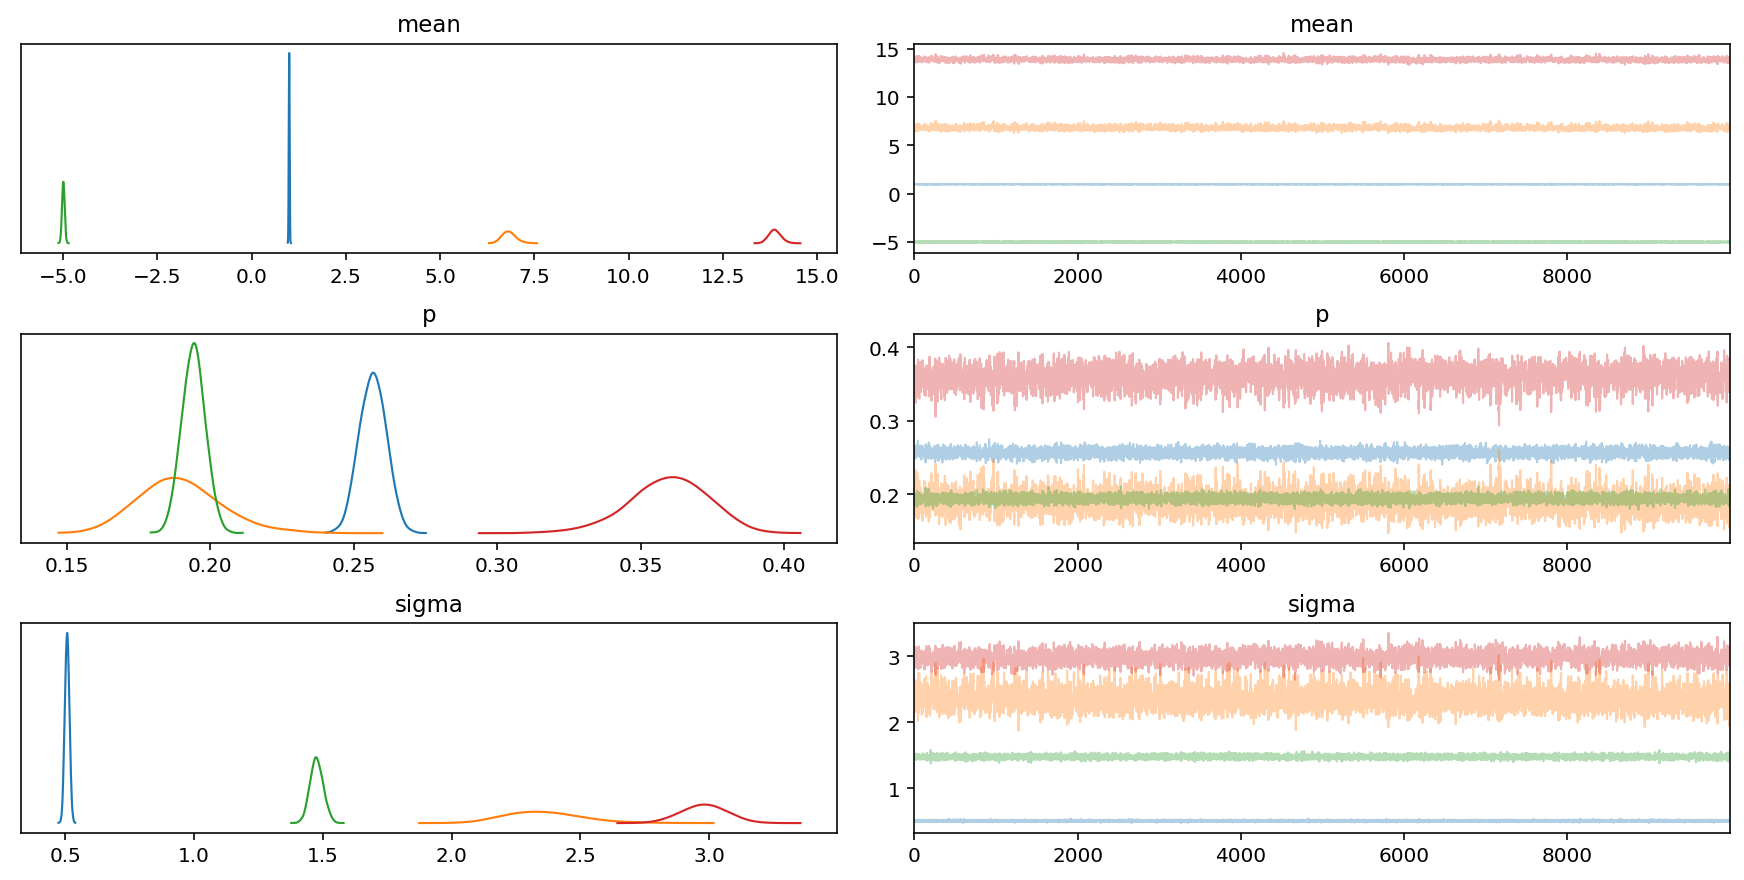

In [13]:
_ = pm.traceplot(trace)

### Having each component defined separately

In [7]:
with pm.Model() as model:
    p = pm.Dirichlet("p", a=np.tile(1, K))
    
    sigma = {}
    mean  = {}
    
    for dist in range(K):
        sigma[dist] = pm.InverseGamma(f"sigma_{dist}", alpha=2, beta=4, shape=(1,))
        mean[dist]  = pm.Normal(f"mean_{dist}", mu=5, sigma=15, shape=(1,))
    
    
    y = pm.Mixture("y", 
                   w=p, 
                   comp_dists=[pm.Normal.dist(mu=mean[dist], sigma=sigma[dist]) for dist in range(K)], 
                   observed=x)

    trace = pm.sample(draws=10000, 
                      chains=1, 
                      tune=2000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (1 chains in 1 job)
NUTS: [mean_3, sigma_3, mean_2, sigma_2, mean_1, sigma_1, mean_0, sigma_0, p]


Sampling 1 chain for 2_000 tune and 10_000 draw iterations (2_000 + 10_000 draws total) took 78 seconds.
Only one chain was sampled, this makes it impossible to run some convergence checks


/home/larry/anaconda3/envs/pymc3/lib/python3.8/site-packages/arviz/data/io_pymc3.py:85: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


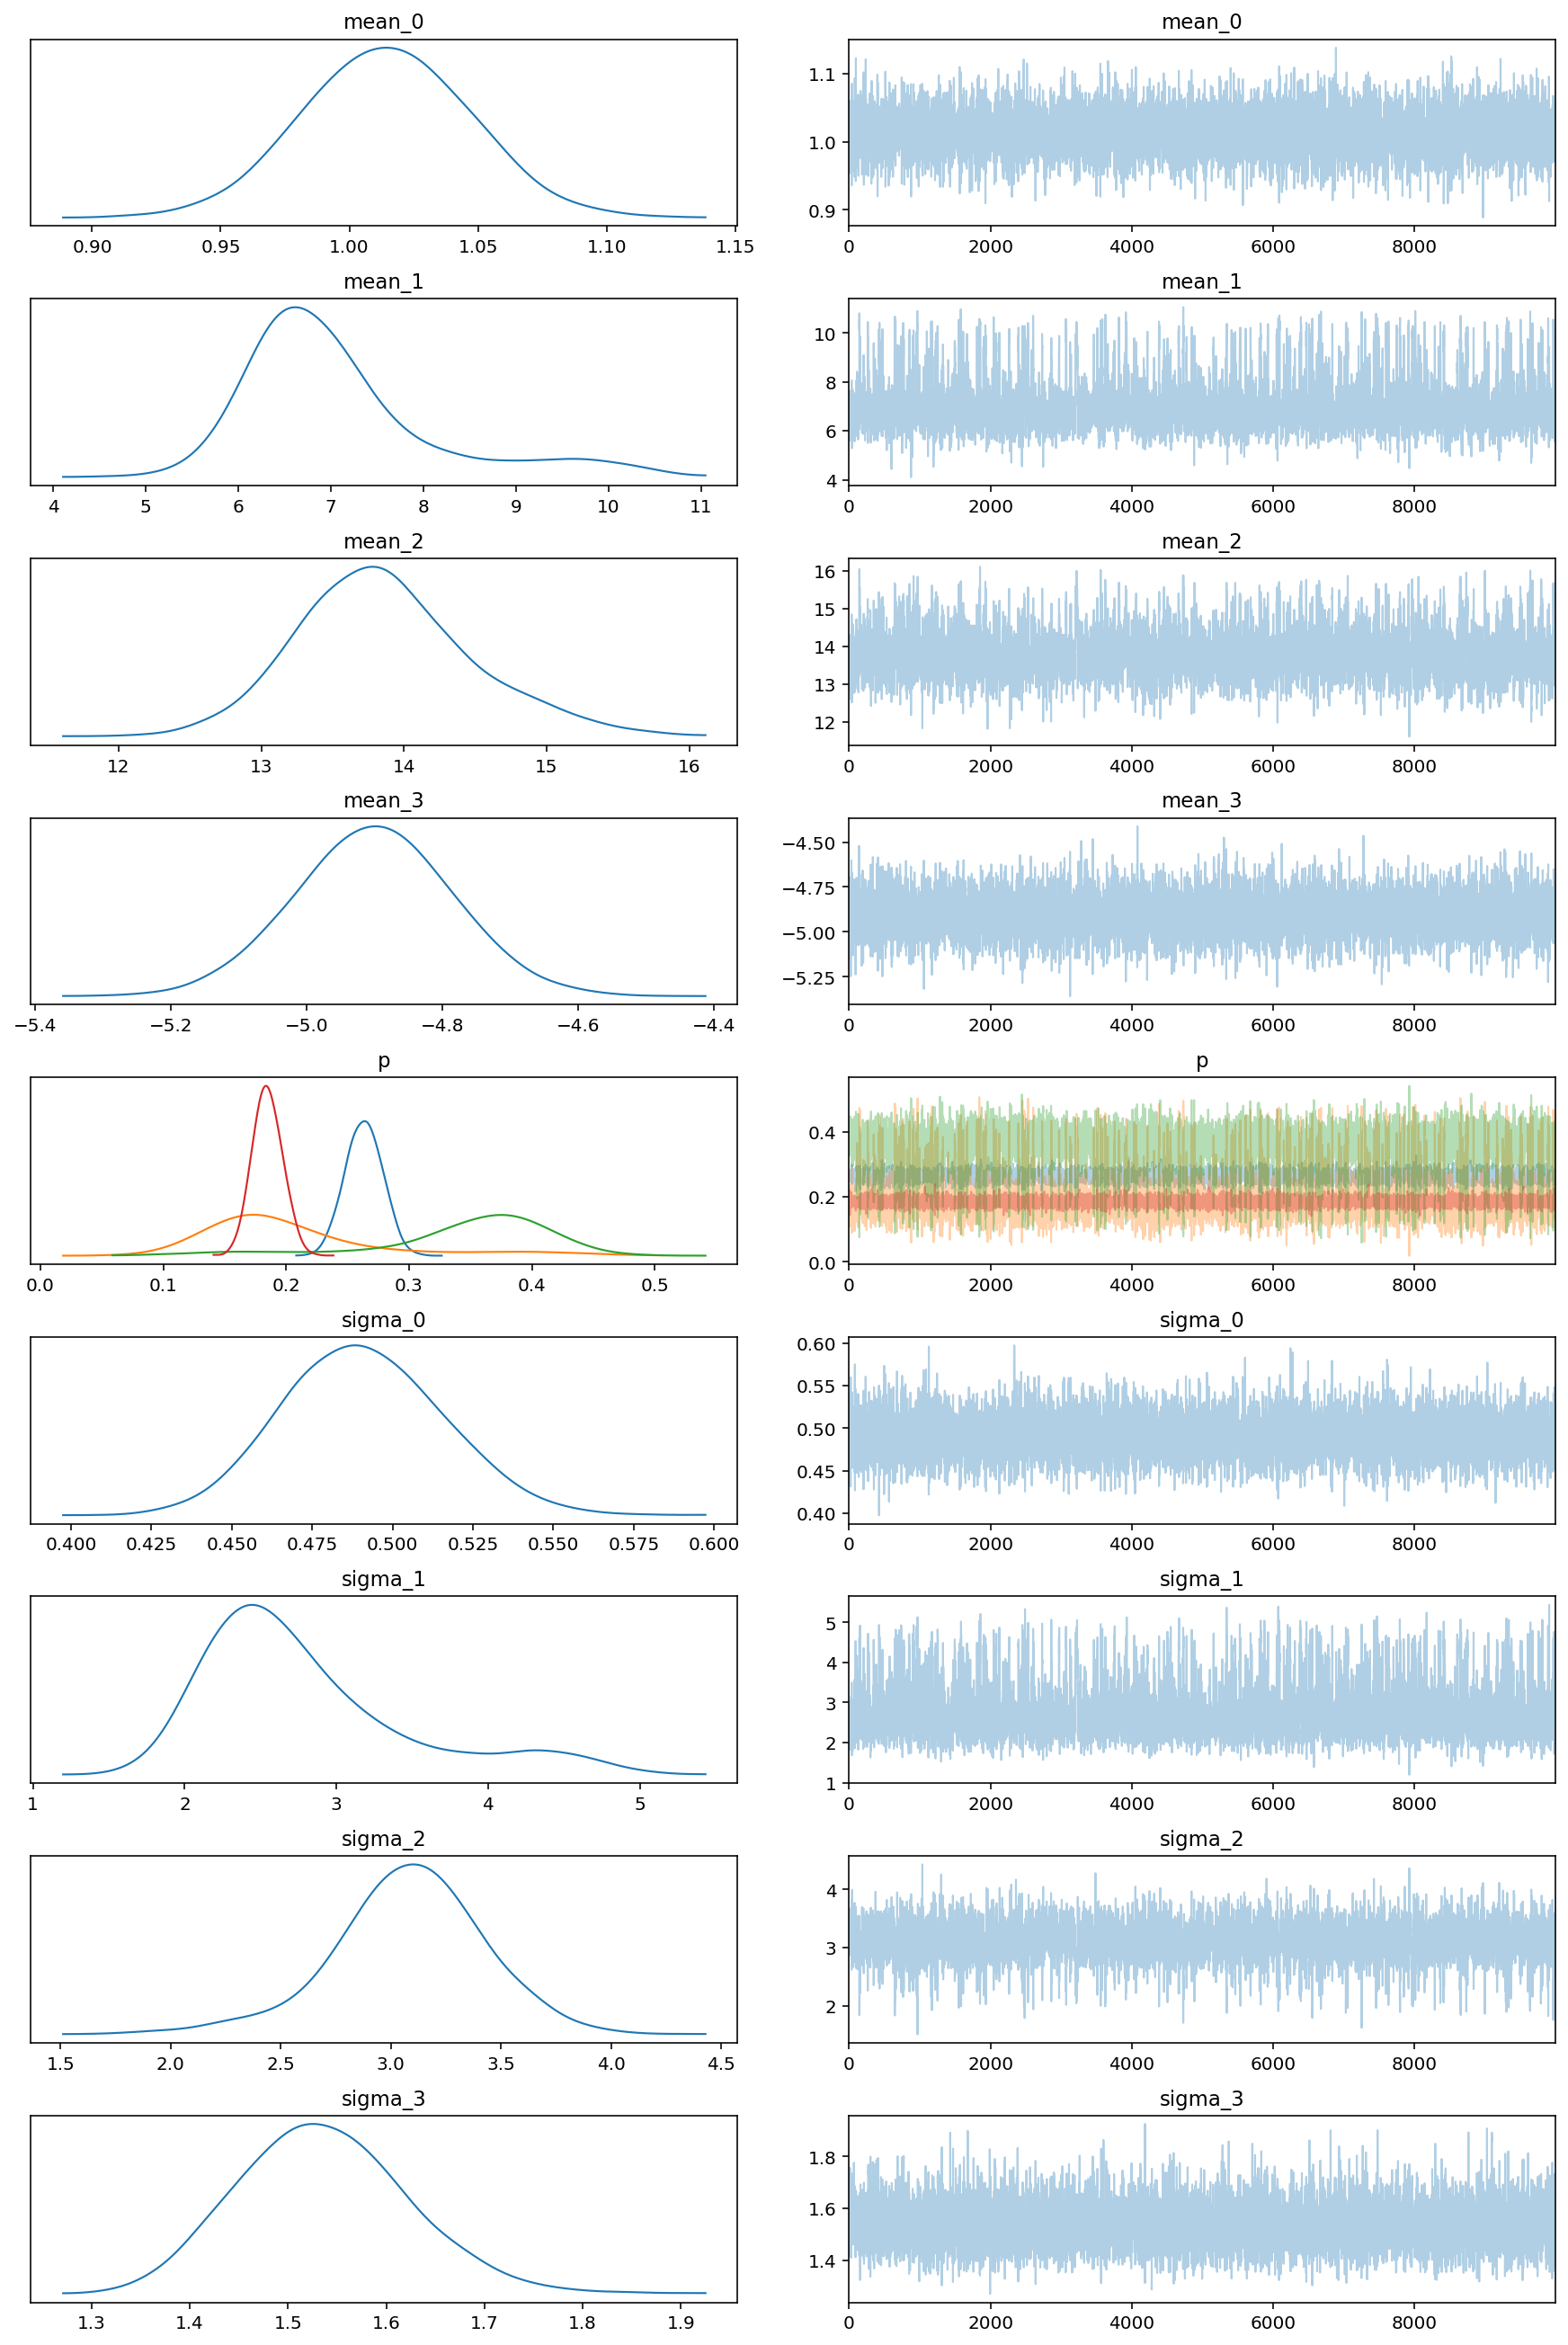

In [8]:
_ = pm.traceplot(trace)